# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Projects\Teleco Customer Churn Analysis\Dataset\Customer Churn Data Set.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Replacing the blank with Zero (0) and changing column data type to float 64

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("Float64")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.0
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.79447
min,0.000000,0.000000,18.250000,0.0
25%,0.000000,9.000000,35.500000,398.55
50%,0.000000,29.000000,70.350000,1394.55
75%,0.000000,55.000000,89.850000,3786.6
max,1.000000,72.000000,118.750000,8684.8


## Checking Duplicate Values

In [8]:
df["customerID"].duplicated().sum()

0

### Converting values in SeniorCitizen Column into yes or no
####        This will make understanding of data better

In [9]:
def Convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(Convert)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Rate of churn

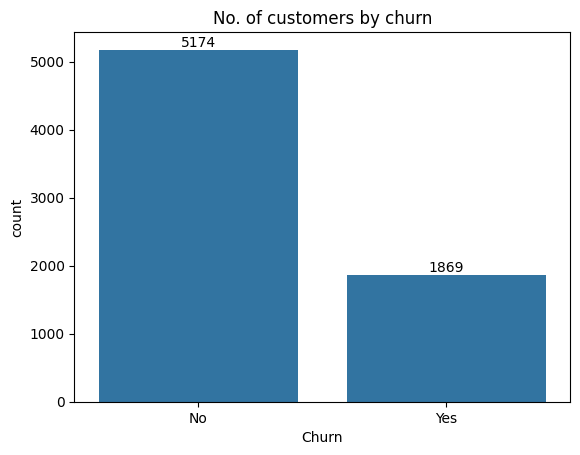

In [11]:
pt  = sns.countplot(x="Churn", data=df)
pt.bar_label(pt.containers[0])
plt.title("No. of customers by churn")
plt.show()

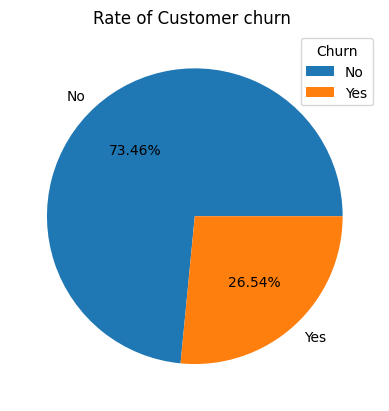

In [12]:
df_gb = df.groupby("Churn").agg(Number_of_churn = ("Churn", "count"))
df_gb
plt.pie(x=df_gb["Number_of_churn"], autopct='%1.2f%%', labels = ["No","Yes"])
plt.legend(title = "Churn")
plt.title("Rate of Customer churn ")
plt.show()

## Impact of Gender on churn
### Churn by gender are comparetively equal

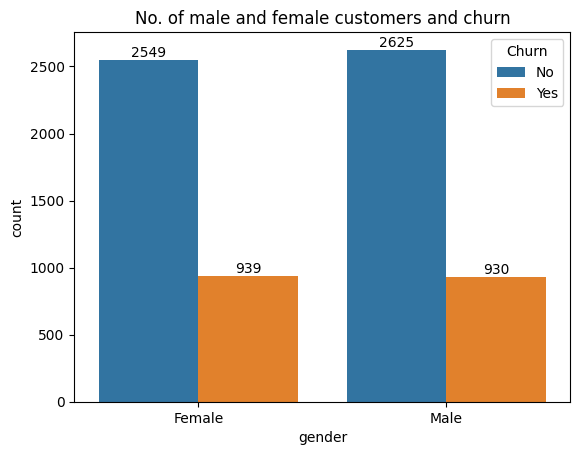

In [13]:
pt2 = sns.countplot(x="gender", data=df, hue="Churn")
pt2.bar_label(pt2.containers[0])
pt2.bar_label(pt2.containers[1])
plt.title("No. of male and female customers and churn")
plt.show()

## Senior Citizen churn
### Camparatively more people in senior citizen have churned

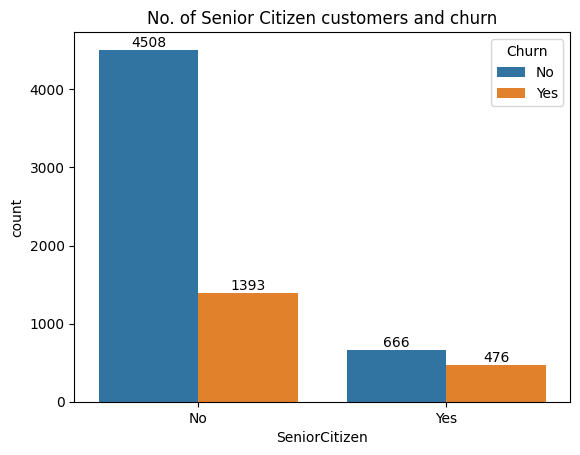

In [14]:
pt2 = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
pt2.bar_label(pt2.containers[0])
pt2.bar_label(pt2.containers[1])
plt.title("No. of Senior Citizen customers and churn")
plt.show()

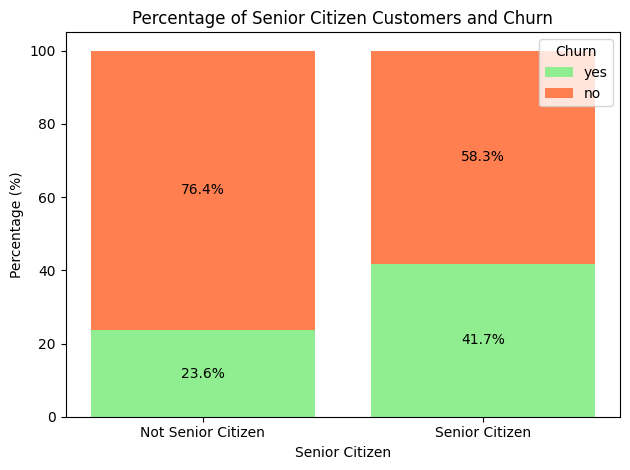

In [15]:
group_totals = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
categories = group_totals.index
yes = group_totals['Yes']
no = group_totals['No']

x = range(len(categories))

# Plot bars
plt.bar(x, yes, label='yes', color='lightgreen')
plt.bar(x, no, bottom=yes, label='no', color='coral')

# Add percentages as text
for i in range(len(categories)):
    plt.text(i, yes.iloc[i]/2, f'{yes.iloc[i]:.1f}%', ha='center', va='center', color='black')
    plt.text(i, yes.iloc[i] + no.iloc[i]/2, f'{no.iloc[i]:.1f}%', ha='center', va='center', color='black')

# Customize the plot
plt.xticks(x, ['Not Senior Citizen', 'Senior Citizen'])  # Custom x-axis labels
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Senior Citizen Customers and Churn')
plt.legend(title='Churn')
plt.tight_layout()

# Show the plot
plt.show()

## Impact of tenure on churn
### Longer-tenured customers are less likely to churn, while shorter-tenured customers are more prone to churn.
### Still there are few customers with long tenure who decided to churn

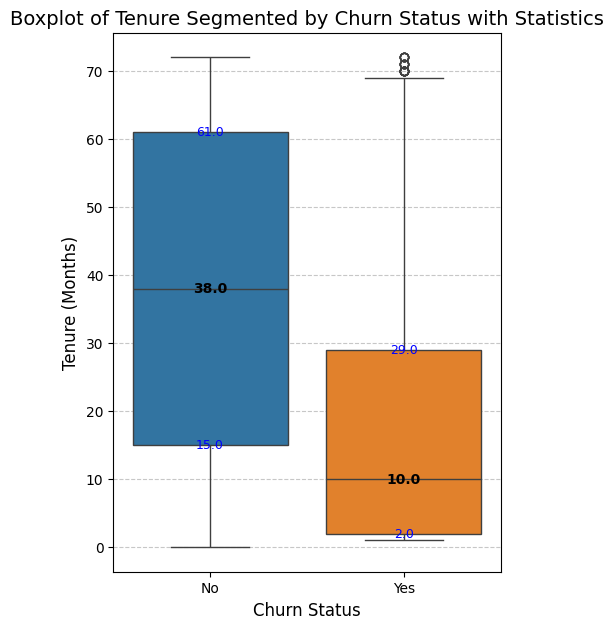

In [16]:
# Prepare the figure
plt.figure(figsize=(5, 7))

# Create the boxplot
boxplot = sns.boxplot(data=df, x='Churn', y='tenure', hue="Churn")

# Calculate and annotate statistics
for i, churn_status in enumerate(df['Churn'].unique()):
    data = df[df['Churn'] == churn_status]['tenure']
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # Annotate median
    plt.text(i, median, f'{median:.1f}', ha='center', va='center', color='black', fontweight='bold', fontsize=10)
    # Annotate Q1 and Q3
    plt.text(i, q1, f'{q1:.1f}', ha='center', va='center', color='blue', fontsize=9)
    plt.text(i, q3, f'{q3:.1f}', ha='center', va='center', color='blue', fontsize=9)

plt.title('Boxplot of Tenure Segmented by Churn Status with Statistics', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Most of the customers have churned out in biginning of their tenure

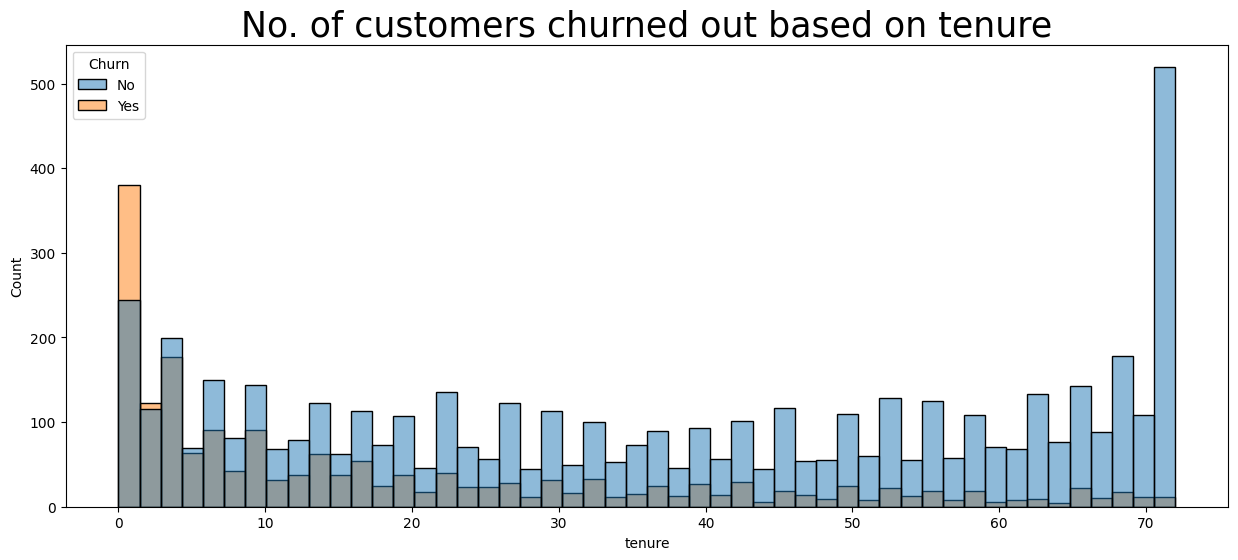

In [17]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="tenure", hue="Churn", bins=50)
plt.title("No. of customers churned out based on tenure",fontsize=25)
plt.show()

## Impact of contract type on churn
### Month to month contract have more churn out than one year or two year contract
### Two year contract have very less churn out 

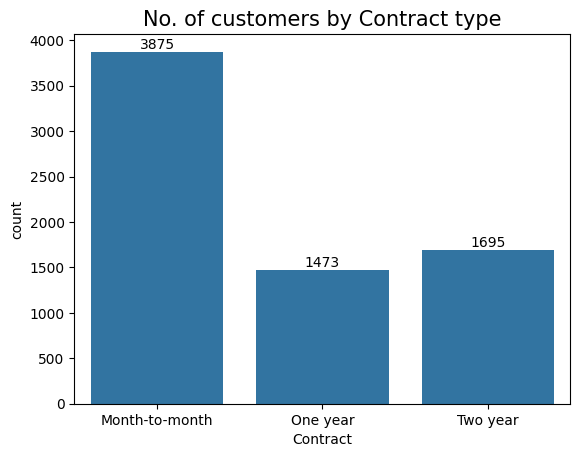

In [18]:
pt4 = sns.countplot(data=df, x="Contract")
plt.bar_label(pt4.containers[0])
plt.title("No. of customers by Contract type",fontsize=15)
plt.show()

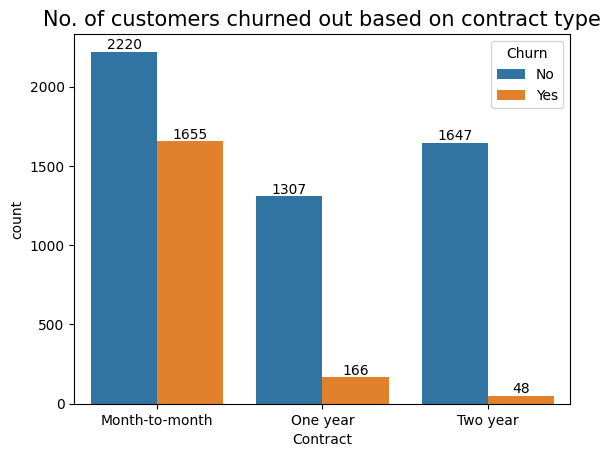

In [19]:
pt3 = sns.countplot(data=df, x="Contract", hue="Churn")
plt.bar_label(pt3.containers[0])
plt.bar_label(pt3.containers[1])
plt.title("No. of customers churned out based on contract type",fontsize=15)
plt.show()

## Service Subcriptions associated with churn
### 1. Services related to internet (especially fiber optic), online security, and tech support are the most influential factors for customer churn.
### 2. Customers who do not opt for additional services like tech support or online security are more likely to churn.
### 3. Streaming services have a minimal impact on churn.

### 1. Churn vs PhoneService:Customers who do not use phone service have a significantly lower churn rate compared to those who use it. Churn is more prevalent among customers who have phone service.
### 2. Churn vs MultipleLines:Customers with no multiple lines have a slightly lower churn compared to those who have multiple lines.There’s no significant difference in churn between customers with or without multiple lines if they have phone service.
### 3. Churn vs InternetService:Customers using fiber optic services have the highest churn rate compared to those using DSL or no internet service.Those without internet service have the lowest churn.
### 4. Churn vs OnlineSecurity:Customers without online security services exhibit a much higher churn rate.Providing online security might reduce churn.
### 5. Churn vs OnlineBackup:Customers without online backup services churn more often than those who have it.There’s a notable churn reduction among customers using online backup services.
### 6. Churn vs DeviceProtection:Customers without device protection have a slightly higher churn rate compared to those who have device protection.Device protection may play a small role in reducing churn.
### 7. Churn vs TechSupport:Customers without tech support services churn at a significantly higher rate.Providing tech support could help retain customers.
### 8. Churn vs StreamingTV:Customers with streaming TV services have slightly higher churn compared to those without it.The difference is not as pronounced as other factors like online security or tech support.
### 9. Churn vs StreamingMovies:Similar to streaming TV, customers with streaming movies have slightly higher churn.Streaming services do not seem to be major drivers of churn compared to security or tech support.

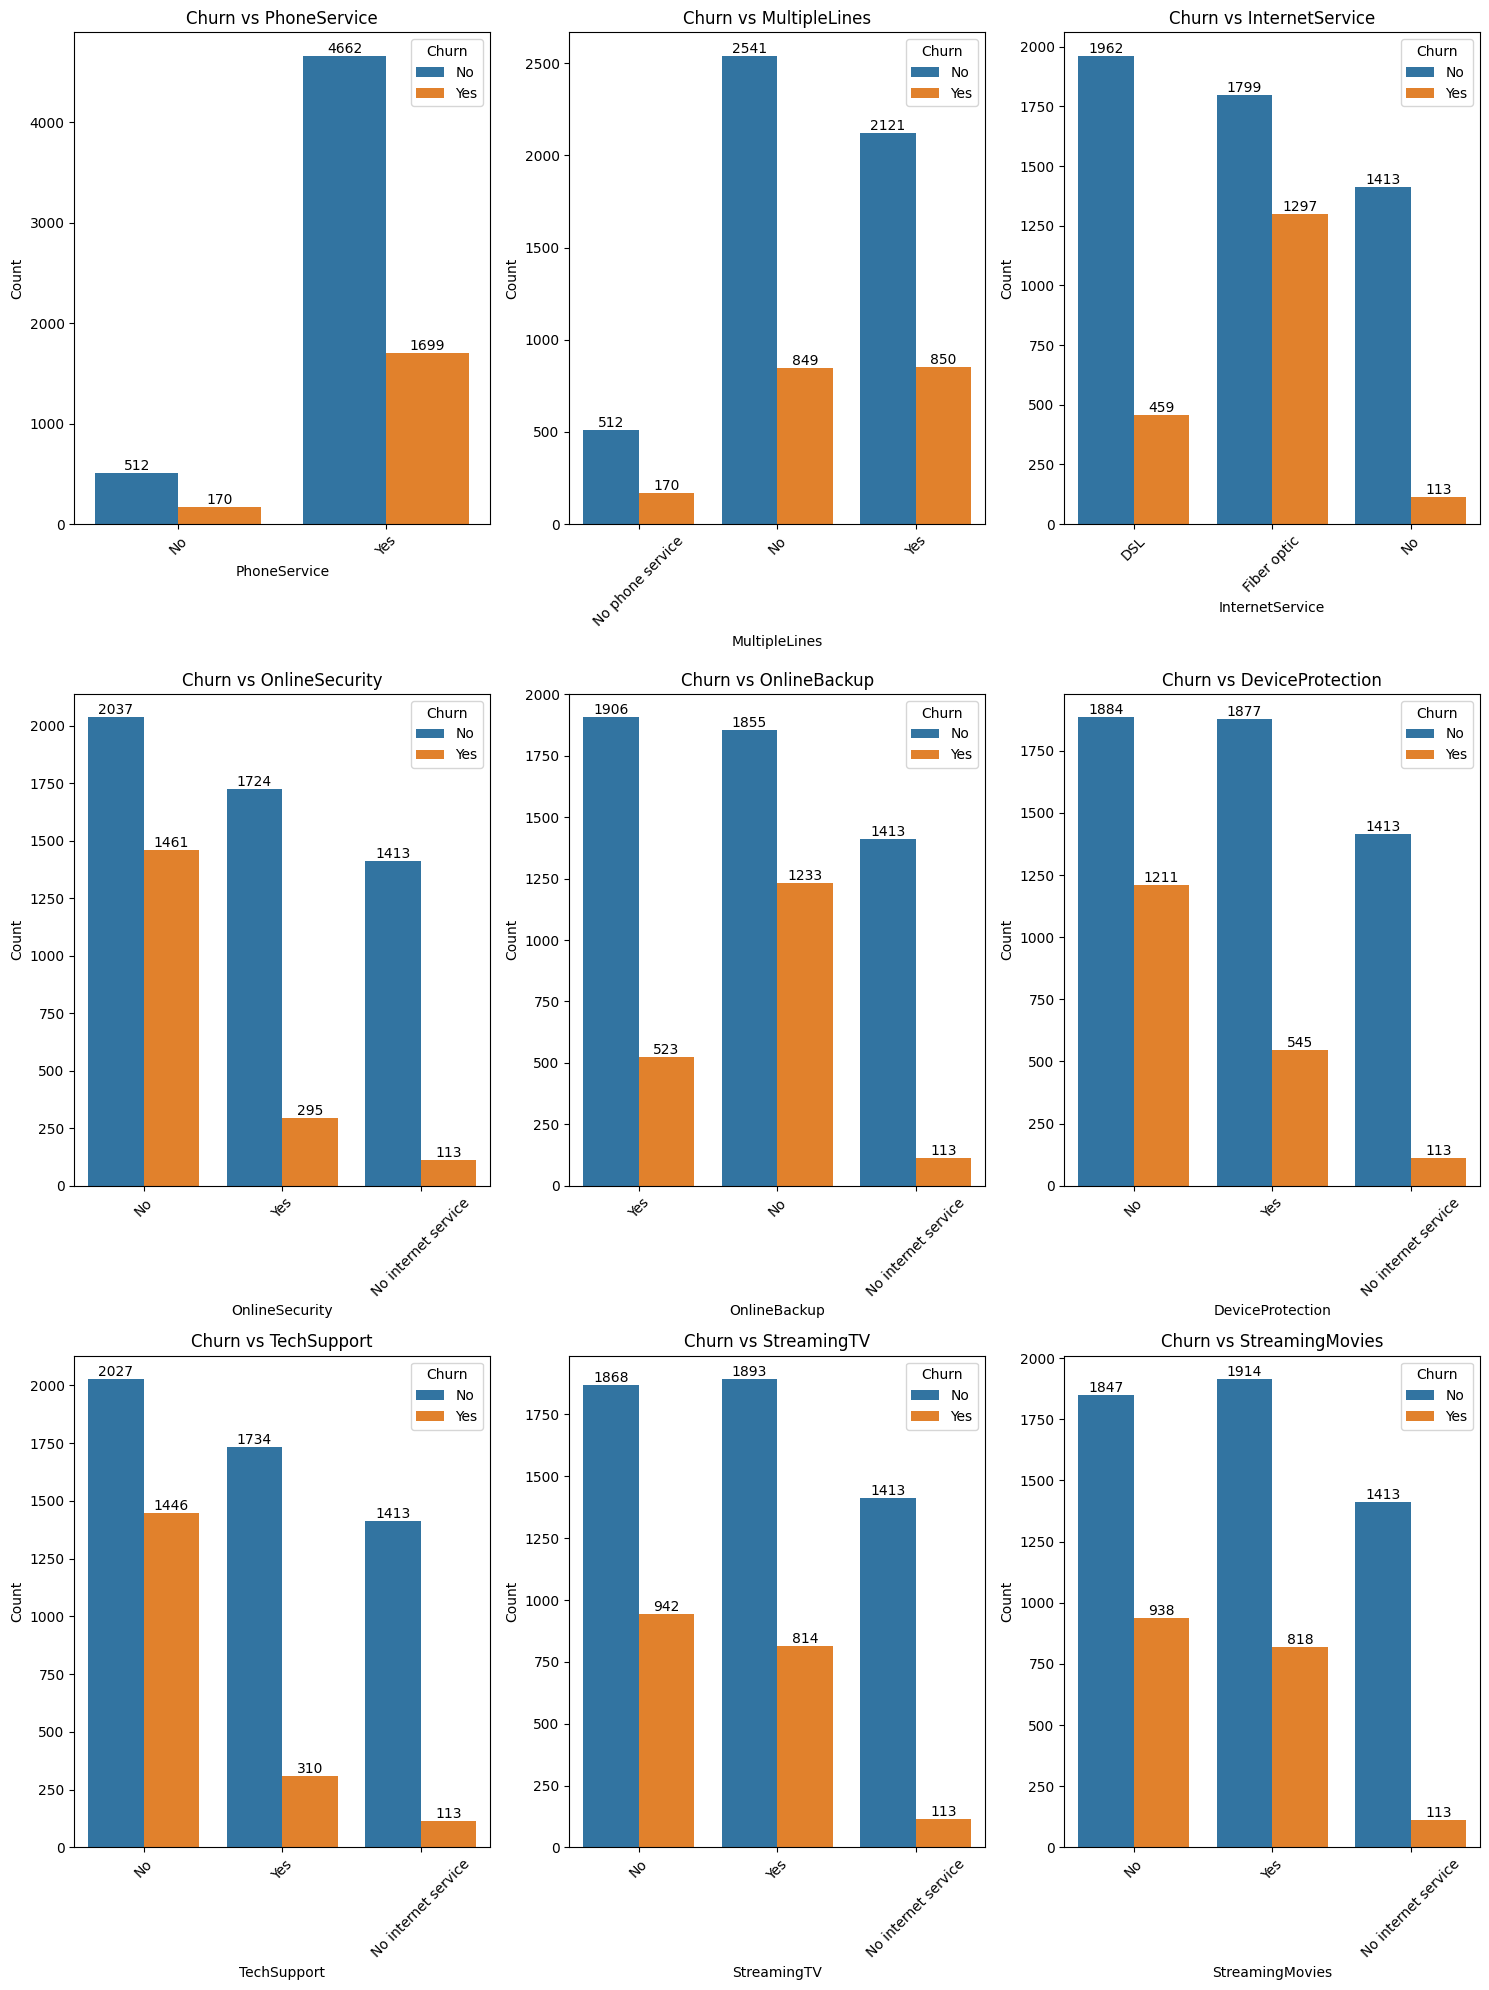

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))  # Adjust the figure size
axes = axes.flatten()  # Flatten to make axes iterable

# Columns to plot
columns_to_plot = [
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

# Iterate through columns and plot on respective subplot
for i, col in enumerate(columns_to_plot):
    pt6 = sns.countplot(data=df, x=col, hue="Churn", ax=axes[i])
    # Add bar labels
    for container in pt6.containers:
        pt6.bar_label(container)  # Add bar labels for each group
    axes[i].set_title(f"Churn vs {col}")  # Add title to each subplot
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(
        axis="x", rotation=45
    )  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

## Payment Method against churn

### Electronic Check have most churned customer

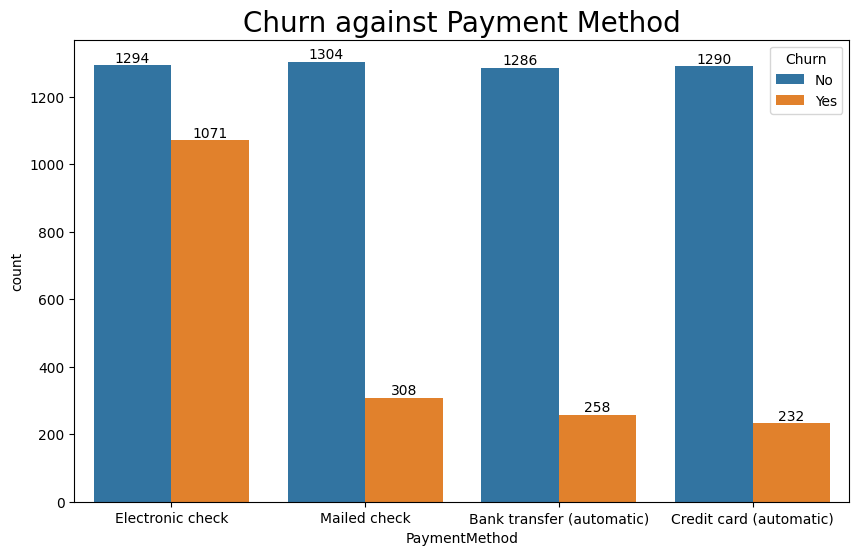

In [21]:
plt.figure(figsize=(10,6))
pt7 = sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.bar_label(pt7.containers[0])
plt.bar_label(pt7.containers[1])
plt.title("Churn against Payment Method", fontsize = 20)

plt.show()


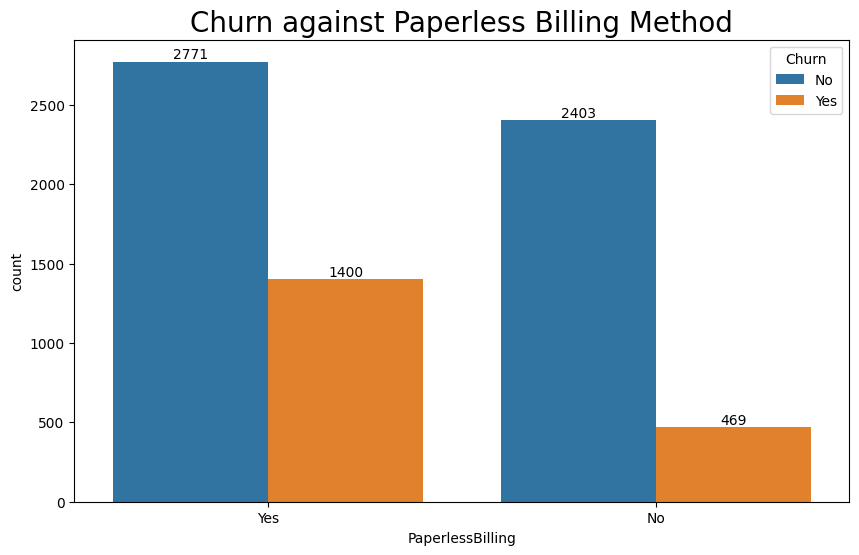

In [22]:
plt.figure(figsize=(10,6))
pt7 = sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.bar_label(pt7.containers[0])
plt.bar_label(pt7.containers[1])
plt.title("Churn against Paperless Billing Method", fontsize = 20)

plt.show()


## Monthly Charges vs Churn
### Low Monthly Charges (<$30): Customers with low monthly charges rarely churn, indicating that low-cost plans effectively retain customers.
### Mid-Range Monthly Charges ($40–$70): Churn and non-churn rates are similar, suggesting this is a transitional cost bracket where churn behavior is less decisive.
### High Monthly Charges (>$80): Higher monthly charges see more churn, likely due to affordability issues or dissatisfaction with value.
### Overall Trend: Lower charges retain customers better, while higher charges lead to churn. Pricing strategies should balance cost and perceived value to minimize churn.

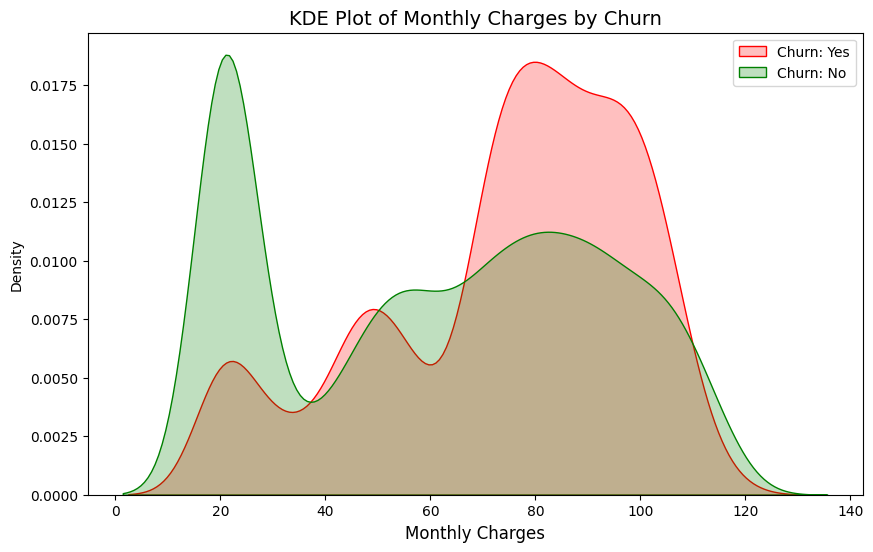

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df["Churn"] == "Yes"], x="MonthlyCharges", fill=True, label="Churn: Yes", color="red")
sns.kdeplot(data=df[df["Churn"] == "No"], x="MonthlyCharges", fill=True, label="Churn: No", color="green")
plt.title("KDE Plot of Monthly Charges by Churn", fontsize=14)
plt.xlabel("Monthly Charges", fontsize=12)
plt.legend()
plt.show()


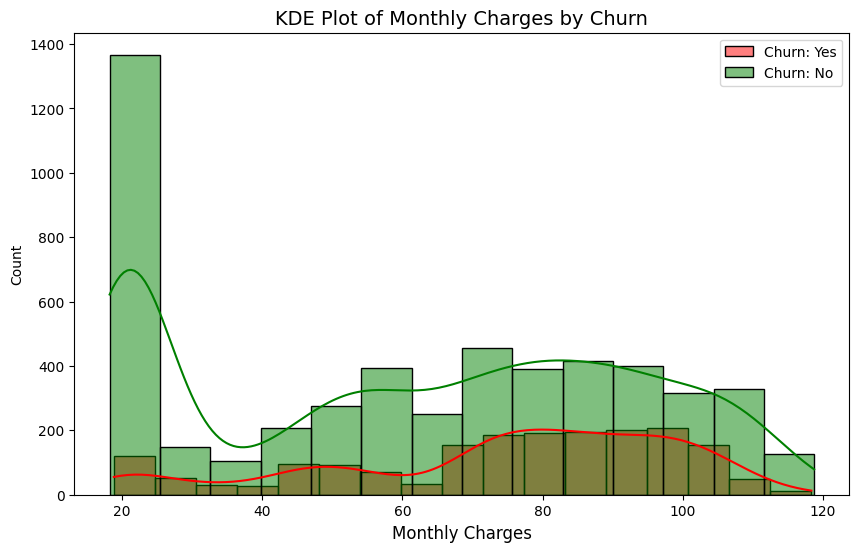

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df["Churn"] == "Yes"], x="MonthlyCharges", fill=True, label="Churn: Yes", color="red", kde=True)
sns.histplot(data=df[df["Churn"] == "No"], x="MonthlyCharges", fill=True, label="Churn: No", color="green", kde=True)
plt.title("KDE Plot of Monthly Charges by Churn", fontsize=14)
plt.xlabel("Monthly Charges", fontsize=12)
plt.legend()
plt.show()


In [25]:
df.to_csv("D:\Projects\Teleco Customer Churn Analysis\Dataset\Analysed Churn Data.csv", index=False)